In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import once
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


In [2]:
# Fetch the dataset
housing_data = fetch_california_housing()
housing = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

housing['MedHouseVal'] = housing_data.target

# Display the first few rows
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
# Feature Engineering
housing['IncomePerPerson'] = housing['MedInc'] / (housing['Population'] + 1)
housing['RoomsPerHouse'] = housing['AveRooms'] / (housing['AveOccup'] + 1)
housing['LogPopulation'] = np.log(housing['Population'] + 1)

# View the updated DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,IncomePerPerson,RoomsPerHouse,LogPopulation
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.025775,1.964286,5.777652
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.003456,2.005934,7.784057
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.014602,2.179792,6.208590
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.010095,1.639640,6.326149
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.006795,1.974515,6.338594


In [7]:
housing['LogMedHouseVal'] = np.log(housing['MedHouseVal'] + 1)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MedInc           20640 non-null  float64
 1   HouseAge         20640 non-null  float64
 2   AveRooms         20640 non-null  float64
 3   AveBedrms        20640 non-null  float64
 4   Population       20640 non-null  float64
 5   AveOccup         20640 non-null  float64
 6   Latitude         20640 non-null  float64
 7   Longitude        20640 non-null  float64
 8   MedHouseVal      20640 non-null  float64
 9   IncomePerPerson  20640 non-null  float64
 10  RoomsPerHouse    20640 non-null  float64
 11  LogPopulation    20640 non-null  float64
 12  LogMedHouseVal   20640 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


In [9]:
housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'IncomePerPerson',
       'RoomsPerHouse', 'LogPopulation', 'LogMedHouseVal'],
      dtype='object')

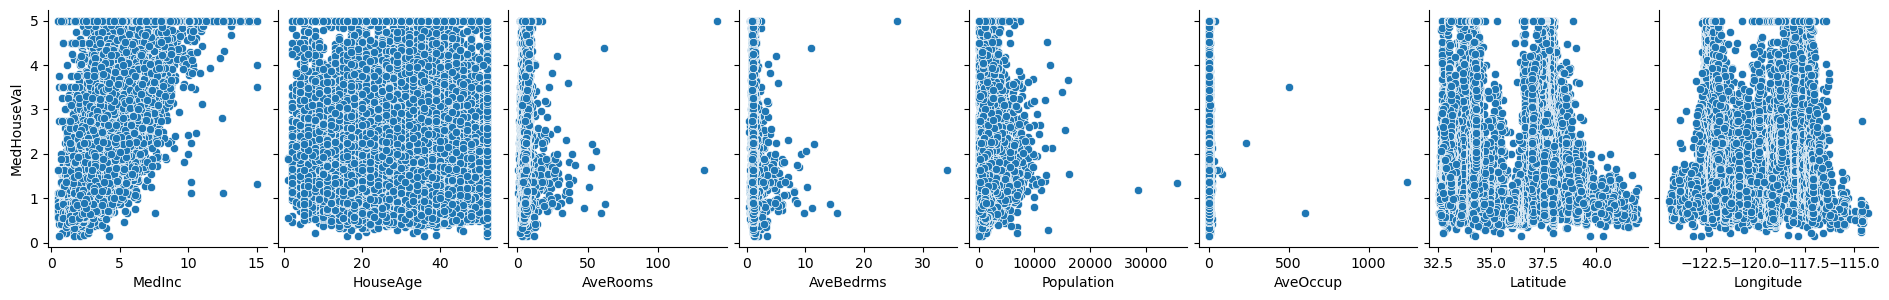

In [10]:
sns.pairplot(housing, 
             x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 
                     'AveOccup', 'Latitude', 'Longitude'], 
             y_vars='MedHouseVal', 
             height=3, aspect=0.8)

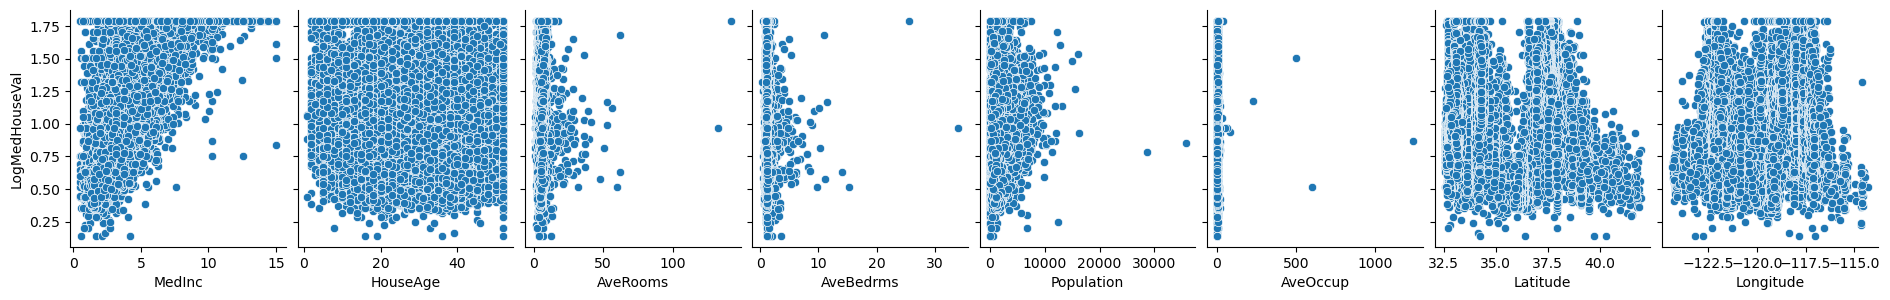

In [11]:
sns.pairplot(housing, 
             x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 
                     'AveOccup', 'Latitude', 'Longitude'], 
             y_vars='LogMedHouseVal', 
             height=3, aspect=0.8)

In [12]:
# Correlation between predictors and MedHouseVal
corr_medhouseval = housing.corr()['MedHouseVal']

# Correlation between predictors and LogMedHouseVal
corr_logmedhouseval = housing.corr()['LogMedHouseVal']

# Print the correlation results
print("Correlation with MedHouseVal:")
print(corr_medhouseval)

print("\nCorrelation with LogMedHouseVal:")
print(corr_logmedhouseval)

Correlation with MedHouseVal:
MedInc             0.688075
HouseAge           0.105623
AveRooms           0.151948
AveBedrms         -0.046701
Population        -0.024650
AveOccup          -0.023737
Latitude          -0.144160
Longitude         -0.045967
MedHouseVal        1.000000
IncomePerPerson    0.119036
RoomsPerHouse      0.203710
LogPopulation     -0.021205
LogMedHouseVal     0.979741
Name: MedHouseVal, dtype: float64

Correlation with LogMedHouseVal:
MedInc             0.676439
HouseAge           0.088588
AveRooms           0.139036
AveBedrms         -0.055263
Population        -0.000176
AveOccup          -0.023449
Latitude          -0.175914
Longitude         -0.033463
MedHouseVal        0.979741
IncomePerPerson    0.106734
RoomsPerHouse      0.188155
LogPopulation      0.007862
LogMedHouseVal     1.000000
Name: LogMedHouseVal, dtype: float64


In [13]:
housing1 = housing[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 
                     'AveOccup', 'Latitude', 'Longitude']].corr()
housing1
          

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

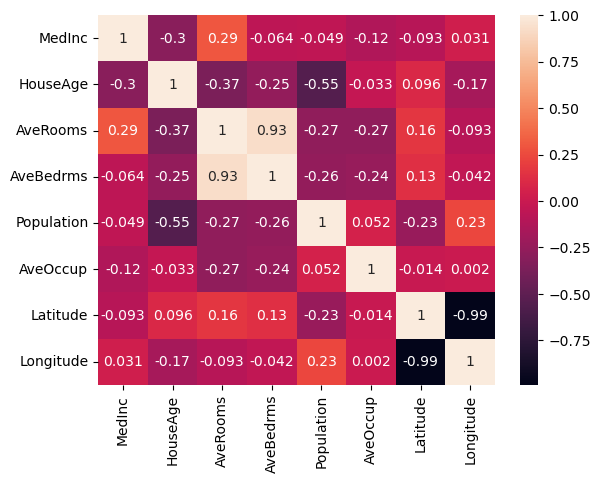

In [14]:
sns.heatmap(housing1.corr(), annot=True)


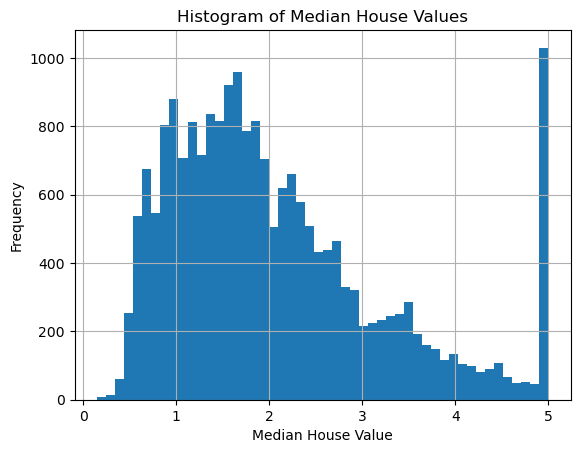

In [15]:
housing['MedHouseVal'].hist(bins=50)
plt.title('Histogram of Median House Values')  
plt.xlabel('Median House Value')  
plt.ylabel('Frequency')  
plt.show()



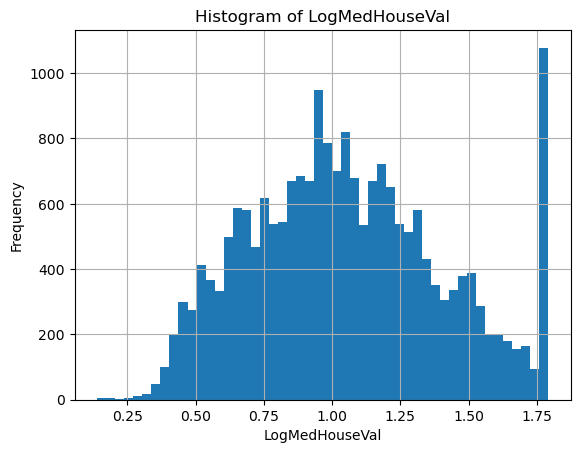

In [16]:
housing['LogMedHouseVal'].hist(bins=50)
plt.title('Histogram of LogMedHouseVal')  
plt.xlabel('LogMedHouseVal')  
plt.ylabel('Frequency')  
plt.show()


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing[['MedInc', 'Population', 'HouseAge']] = scaler.fit_transform(housing[['MedInc', 'Population', 'HouseAge']])

# Feature Engineering
housing['IncomePerPerson'] = housing['MedInc'] / (housing['Population'] + 1)
housing['RoomsPerHouse'] = housing['AveRooms'] / (housing['AveOccup'] + 1)
housing['LogPopulation'] = np.log(housing['Population'] + 1)

# View the updated DataFrame
housing.head()

C:\Users\ajibo\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,IncomePerPerson,RoomsPerHouse,LogPopulation,LogMedHouseVal
0,2.344766,0.982143,6.984127,1.023810,-0.974429,2.555556,37.88,-122.23,4.526,91.694843,1.964286,-3.666281,1.709464
1,2.332238,-0.607019,6.238137,0.971880,0.861439,2.109842,37.86,-122.22,3.585,1.252922,2.005934,0.621350,1.522790
2,1.782699,1.856182,8.288136,1.073446,-0.820777,2.802260,37.85,-122.24,3.521,9.946842,2.179792,-1.719126,1.508733
3,0.932968,1.856182,5.817352,1.073059,-0.766028,2.547945,37.85,-122.25,3.413,3.987519,1.639640,-1.452554,1.484555
4,-0.012881,1.856182,6.281853,1.081081,-0.759847,2.181467,37.85,-122.25,3.422,-0.053637,1.974515,-1.426478,1.486592


In [18]:
housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'IncomePerPerson',
       'RoomsPerHouse', 'LogPopulation', 'LogMedHouseVal'],
      dtype='object')

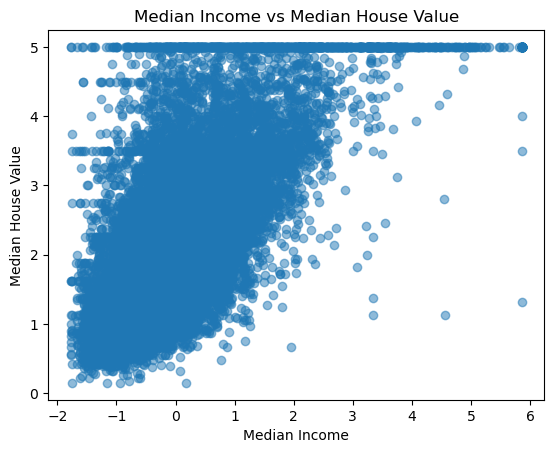

In [19]:
plt.scatter(housing['MedInc'], housing['MedHouseVal'], alpha=0.5)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

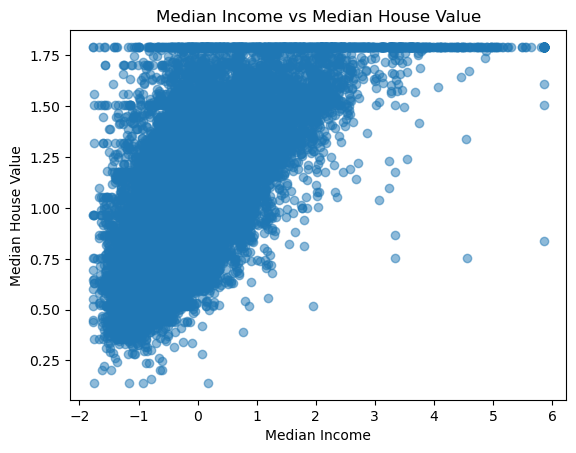

In [20]:
plt.scatter(housing['MedInc'], housing['LogMedHouseVal'], alpha=0.5)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [21]:
# Select features and target
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
X = housing[features]
y = housing['MedHouseVal']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
# Train model
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
lm.coef_

array([ 0.83434706,  0.13012283, -0.10541189,  0.59060588,  0.0072886 ,
       -0.04106042, -0.41039244, -0.42098061])

In [27]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
cdf

,Coef
MedInc,0.834347
HouseAge,0.130123
AveRooms,-0.105412
AveBedrms,0.590606
Population,0.007289
AveOccup,-0.041060
Latitude,-0.410392
Longitude,-0.420981


In [28]:
print(lm.intercept_)

-33.60233021761727


In [35]:
predictions = lm.predict( X_test)
print(predictions)

[3.1519632  5.51522297 1.63359669 ... 1.09831725 0.89065921 2.21987232]


Text(0, 0.5, 'Predicted Y')

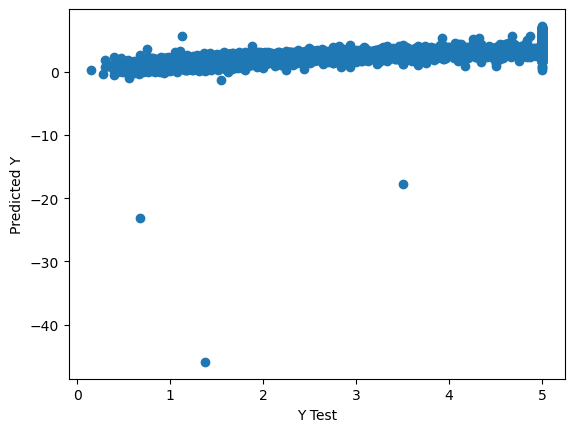

In [30]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\Users\ajibo\AppData\Local\Temp\ipykernel_9224\2847403256.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot ((y_test-predictions))


<Axes: xlabel='MedHouseVal', ylabel='Density'>

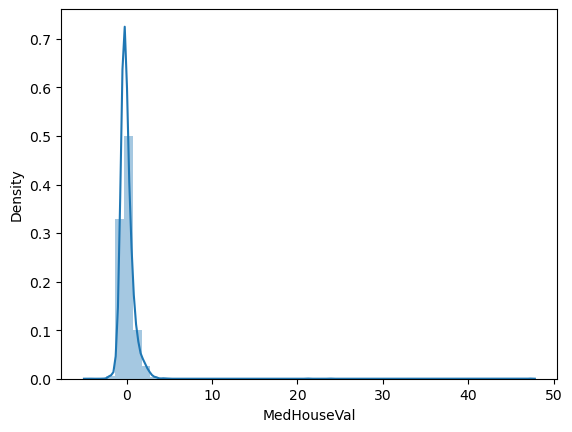

In [31]:
sns.distplot ((y_test-predictions))

In [32]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5447635351616535
MSE: 1.0560037436551226
RMSE: 1.027620427811321


In [33]:
# Predict on the test set
y_pred = lm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.0560037436551226
R^2 Score: 0.21964545714366313
